In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
%matplotlib inline

from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                 
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.fit_transform(Xtest)
Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=boston.feature_names)
Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=boston.feature_names)

In [143]:
from sklearn.manifold import TSNE

model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(Xtrain_scaled)

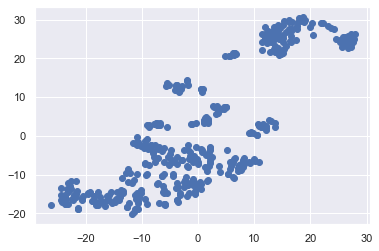

In [144]:
plt.scatter(model_tsne[:,0], model_tsne[:,1])

In [145]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, max_iter=100, random_state=42).fit(Xtrain_scaled)


In [146]:
labels_train = km.predict(Xtrain_scaled)

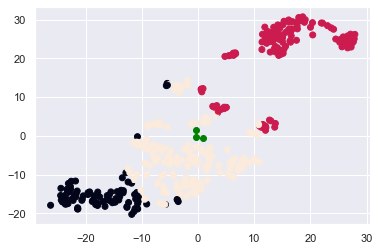

In [147]:
plt.scatter(model_tsne[:,0], model_tsne[:,1], c = labels_train)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green')

In [148]:
labels_test = km.predict(Xtest_scaled)

In [162]:
XCRIM1 = Xtrain.loc[labels_train==0, 'CRIM'].mean()
XCRIM2 = Xtrain.loc[labels_train==1, 'CRIM'].mean()
XCRIM3 = Xtrain.loc[labels_train==2, 'CRIM'].mean()
print(f'Значение СRIM для кластера 1 = {XCRIM1}, для кластера 2 = {XCRIM2}, для кластера 3 = {XCRIM3}.')

Значение СRIM для кластера 1 = 0.07356558139534886, для кластера 2 = 10.797028425196853, для кластера 3 = 0.42166020942408367.
